# The sky in a notebook: the `ipyaladin` widget

<u>Matthieu Baumann</u>¹, Thomas Boch¹, Tom Czekaj & <u>Manon Marchand</u>¹

1. Strasbourg Astronomical Data Centre (CDS)

***

<img align="center" src="assets/CDS-logo.png" width="40%"/>

## The Aladin project

<img src="assets/qr-code/aladin.svg"
style="width: 20%; position:absolute; right:10px; top:0"></img>

* Started at the beginning of the 90s
* Development of a complete desktop java version since then

<img src="assets/first-paper.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
        width:60%;
"></img>

### Desktop JAVA version

<img src="assets/aladin-desktop.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:60%;
"></img>
<ul>
    <li>Data discovery tree (sky images and tabular data)</li>
    <li>Keywords filter (name of telescope, magnitude range, ...)</li>
    <li>Main view</li>
    <li>Survey and overlays stack (catalogs, footprints, images)</li>
</ul>

### How does this work ?

Rendering of squared tile images - The more you zoom the more you see

In [2]:
import IPython
iframe = '<iframe src="./al-adass2022.html" style="width:100%; height: 600px"></iframe>'
IPython.display.HTML(iframe)

This is made possible thanks to the HEALPix tesselation of the sky.

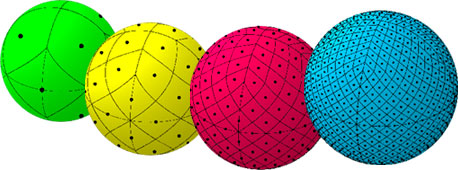

* Equal area cells for a specific order
* 12 base cells at depth 0
* Each cell is subdivided into 4 at order+1 

## Aladin Lite: a web client to embed in your web projects

* Project started in 2013
* Developed in Rust with an access to the GPU with WebGL2. Compiled to WebAssembly and wrapped around a JS API.
* Open source development, source code, API documentation and releases available on GitHub. (scan our Qr-code)

<img src="assets/qr-code/AladinLiterepo.svg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:20%;
"></img>

* It is lightweight: < 1MB

* Used as the rendering engine behind ESASky, the ESO science portal, HEASARC NASA web portal

<table>
    <tr>
        <th>ESASky</th>
        <th>ESO Science archive</th>
    </tr>
    <tr>
        <td><img src="assets/esasky.jpg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:400px;
"></img></td>
        <td><img src="assets/eso-science-portal.jpeg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:400px;
"></img></td>
    </tr>
</table>


* Between 30000 and 40000 startups a day.

<img src="assets/aladin lite startups.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:50%;
"></img>
    
* Aladin lite is published as a universal common js module as well as a ES module through NPM.

## `ipyaladin` in action: exploration of the Perseus's Cluster of galaxies

<img src="assets/logo.png" width="20%"> 

Change target from Python

In [4]:
aladin.target = "Perseus Cluster"

In [6]:
target = aladin.target
target

<SkyCoord (ICRS): (ra, dec) in deg
    (49.94667, 41.51306)>

Read the relevant field of view

In [7]:
field_of_view = aladin.fov
field_of_view

<Angle 60. deg>

 ## Identify the galaxies in one click

<img src="assets/target.png" width="10%" align="center center">


The information comes from the SIMBAD bibliographic database

In [8]:
from astroquery.simbad import Simbad

ModuleNotFoundError: No module named 'astroquery'

In [9]:
known_galaxies = Simbad.query_region(
    target,
    radius=field_of_view,
    criteria="otype = 'G..'"
)
print(f"Found {len(known_galaxies)} galaxies in {field_of_view.deg}° around this point.")

NameError: name 'Simbad' is not defined

In [10]:
aladin.add_table(known_galaxies, color="lightgreen", name="known_galaxies")

NameError: name 'known_galaxies' is not defined

Some of them are missing. Let's see what we can learn from other sources

## Multi-wavelength caracterization

The physical information lies in different parts of the electromagnetic spectrum, that are explored by different telescopes.

 <img src="assets/spectrum.png" width="100%" align="right"> 

 Let's explore `ipyaladin`'s features along this spectrum. 

<img src="assets/askap_euclid.png" width="80%">

### ASKAP Mid Survey: layering data sources

Let's have a look at Eclid's early release data



In [11]:
aladin.survey = "CDS/P/Euclid/ERO/FirstImages"

This is 6 GB of pixels only in this field of view. Hard to work with this in RAM.

In [20]:
euclid_cutout = aladin.get_view_as_fits()[0]

In [7]:
import matplotlib.pyplot as plt
import numpy as np

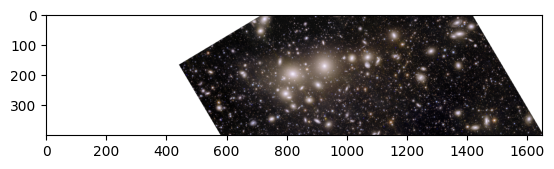

In [21]:
plt.imshow(np.moveaxis(euclid_cutout.data, 0, -1))

or explore via the GUI interface

<img src="assets/browse_hips.png" width="20%">

the pixels on screen can be saved as png images

In [10]:
aladin.save_view_as_image("euclid.png")

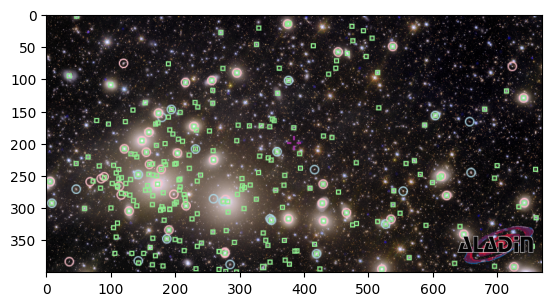

In [12]:
plt.imshow(plt.imread("euclid.png"))

 <img src="assets/gaia.png" width="80%"> 

### Catalog data from Gaia

In [13]:
from astroquery.vizier import Vizier

In [27]:
extra_galactic = Vizier(catalog="I/356/galcand", row_limit=-1).query_region(
    aladin.target,
    radius=field_of_view
)[0]
extra_galactic

Source,SolID,Class,PGal,PQSO,z,RA_ICRS,DE_ICRS,_RA.icrs,_DE.icrs
,,,,,,deg,deg,deg,deg
int64,int64,str15,float64,float64,float64,float64,float64,float64,float64
236119404807989120,1636148068921376768,GALAXY,1,0,0.120451,50.82985561392,40.43415833563,50.82985561392,40.43415833563
236120092003620736,1636148068921376768,,1,0,0.153355,50.88291737821,40.50579657440,50.88291737821,40.50579657440
236122050508706688,1636148068921376768,,1,1.444381e-14,0.0708114,50.95351476670,40.55779652745,50.95351476670,40.55779652745
236122153587921152,1636148068921376768,,1,0,0.0849699,50.96029772134,40.58201611662,50.96029772134,40.58201611662
236153249150601472,1636148068921376768,GALAXY,1,0,0.177419,51.27027332824,40.75632522079,51.27027332824,40.75632522079
236144109460768896,1636148068921376768,GALAXY,0.9918105,0.008189524,0.106001,51.20903086489,40.67815687451,51.20903086489,40.67815687451
236145208968955264,1636148068921376768,,1,0,--,51.07476197673,40.61158317489,51.07476197673,40.61158317489
236145964886608640,1636148068921376768,GALAXY,0.001815567,1.786401e-05,--,51.06604886279,40.63497758644,51.06604886279,40.63497758644


In [28]:
aladin.add_table(extra_galactic[extra_galactic["Class"] == "GALAXY"], 
                 shape="circle", source_size=15, color="lightblue",
                 name="galaxies")
aladin.add_table(extra_galactic[extra_galactic["Class"] != "GALAXY"], 
                 shape="circle", source_size=15, color="pink",
                 name="candidates")

We can retrieve a sub-selection of these tables

In [36]:
aladin.selected_objects

[<Table length=12>
       Source              SolID        ...     _RA.icrs        _DE.icrs   
       str18               str19        ...      str15           str15     
 ------------------ ------------------- ... --------------- ---------------
 239415912467689728 1636148068921376768 ...  49.83521159734  41.41590586036
 239416359145061504 1636148068921376768 ...  49.84609730976  41.49116690022
 239418901765706496 1636148068921376768 ...  49.77121567755  41.47017707475
 239418901765706880 1636148068921376768 ...  49.76933830525  41.46857843725
 239420173075426176 1636148068921376768 ...  49.70036962108  41.52876651172
 239420447953987968 1636148068921376768 ...  49.76006008782  41.55021641104
 239420997708936704 1636148068921376768 ...  49.93596277400  41.44646209332
 239421650543918720 1636148068921376768 ...  49.98146447470  41.52311025012
 239422234660320512 1636148068921376768 ...  49.86147868338  41.49428058786
 239422853135604608 1636148068921376768 ...  49.89016178916  41.55356

<img src="assets/chandra.png" width="80%">

### Drawing shapes on the Chandra Survey

In [37]:
aladin.survey = "cxc.harvard.edu/P/cda/hips/allsky/rgb"

These are shockwaves. We can draw their shapes with the polygon MOC drawing tool (MOCs are ensemble of pixels on the sky)

## How did we do the widget

<img src="assets/formula.png">